In [1]:
# Standard 
import os, sys , copy ,shutil, logging, csv, json, logging
logger = logging.getLogger()
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from streamm import values

import dask
from dask import delayed
# Import all the streamm modules
from streamm import *

%load_ext autoreload
%autoreload 2

In [2]:
local = resource.Resource('local')
local.load_json()
peregrine = resource.Resource('peregrine')
peregrine.load_json()

Reading in resource json file res_local.json 
Reading in resource json file res_peregrine.json 


In [3]:
peregrine.properties['queue'] = 'short'
peregrine.properties['walltime'] = 4
peregrine.properties['feature'] = '24core'
peregrine.properties['ppn'] = 24
peregrine.properties['nproc'] = 24

print peregrine.properties

{u'allocation': u'orgopv', u'scratch': u'/scratch/tkemper', u'ppn': 24, u'feature': '24core', u'queue': 'short', u'e-mail': u'travis.kemper@nrel.gov', u'exe_command': u'qsub ', u'nproc': 24, u'nodes': 1, u'pmem': 1500, u'walltime': 4}


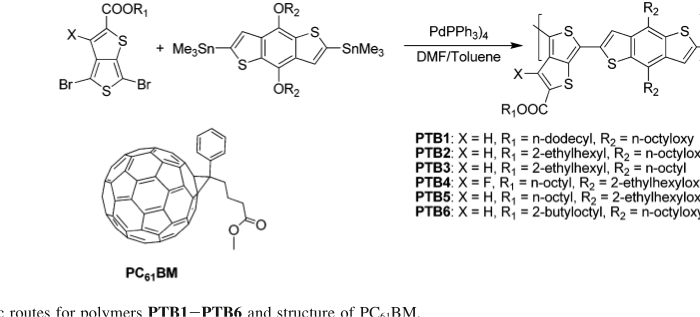

In [4]:
from IPython.display import Image
Image(filename=local.dir['home']+'/figures/PTBX.png')

In [5]:
proj_ref = 'res_et2'
proj_ref = project.Project('DAPpolymers_%s'%(proj_ref))
proj_ref.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [6]:
for key in proj_ref.calculations.keys():
    print key

D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2


In [ ]:
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3'].meta['update'] = 'ready'
proj_ref.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3'].meta['update'] = 'ready'
proj_ref.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3'].meta['update'] = 'ready'
proj_ref.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4'].meta['update'] = 'ready'
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'

In [7]:
name_l = []
name_l.append('BDT-TPD')
name_l.append('PTB1')
name_l.append('PTB5')
name_l.append('PTB4')
name_l.append('PTB7')
name_l.append('PCE10')

In [8]:
proj_tag = 'res_sp1'
proj_i = project.Project('DAPpolymers_%s'%(proj_tag))
proj_i.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [9]:
for rtag, ref_i in proj_ref.calculations.iteritems():        
    if( ref_i.meta['update'] == 'ready' ):
        print rtag
        print ref_i.files['input']['cply']



D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2.cply
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2.cply
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2.cply
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2.cply


In [ ]:
def setup_calc(ref_i):
    os.chdir(ref_i.dir['launch'])
    calc_i = calculation.CalculationRes('%s_%s'%(ref_i.tag,proj_tag))
    calc_i.add_refcalc(ref_i)
    calc_i.set_resource(peregrine)
    calc_i.make_dir()
    calc_i.properties['scratch'] = calc_i.dir['scratch']
    calc_i.dir['templates'] = '/Users/tkemper/Development/streamm-tools/templates'
    calc_i.dir['scripts'] = '/Users/tkemper/Development/streamm-tools/scripts'

    os.chdir(calc_i.dir['launch'])
    
    shutil.copyfile(ref_i.dir['launch']+'/'+'DA.list',calc_i.dir['launch']+'/'+'DA.list')
    calc_i.files['input']['list_i'] = 'DA.list'
    cply_file = ref_i.files['input']['cply'] #"%s.cply"%(ref_i.tag)

    shutil.copyfile(ref_i.dir['launch']+'/'+cply_file,calc_i.dir['launch']+'/'+cply_file)
    calc_i.files['input']['cply'] = cply_file

    file_type = 'templates'
    file_key = 'run'
    file_name = "streamm_peregrine.pbs"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'templates'
    file_key = 't_nwproj'
    file_name = "nwchem_peregrine.pbs"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'templates'
    file_key = 't_nw'
    file_name = "nwchem_sp.nw"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'templates'
    file_key = 't_run'
    file_name = "nwchem.sh"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'scripts'
    file_key = 'run_proj'
    file_name = "run_proj.py"
    from_dirkey = 'scripts'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'scripts'
    file_key = 'py_script'
    file_name = "calc_groups.py"
    from_dirkey = 'scripts'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    



    calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['scripts']['py_script'],calc_i.tag,calc_i.files['input']['cply'])
    calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['list_i'])
    calc_i.properties['streamm_command'] += ' --t_nw %s '%(calc_i.files['templates']['t_nw'])
    calc_i.properties['streamm_command'] += ' --t_run %s '%(calc_i.files['templates']['t_run']) 
    calc_i.properties['streamm_command'] += ' --jobs_node 500'
    calc_i.properties['streamm_command'] += ' --ppn 16'    
    calc_i.properties['streamm_command'] += ' --group_id residue '
    calc_i.properties['streamm_command'] += ' --hterm  '
    
    print calc_i.properties['streamm_command']    
    
    calc_i.load_str('templates','run')
    calc_i.replacewrite_prop('run','scripts','run','%s.pbs'%(calc_i.tag))
    
    file_type = 'output'
    file_key = 'log'
    file_name = "%s.log"%(calc_i.tag)
    calc_i.add_file(file_type,file_key,file_name)
    
    calc_i.properties['finish_str'] ='Finished'
    
    return calc_i 
    

In [ ]:
for rtag, ref_i in proj_ref.calculations.iteritems():
    if( ref_i.meta['update'] == 'ready' ):
        calc_i = setup_calc(ref_i)
        proj_i.calculations[calc_i.tag] = copy.deepcopy(calc_i)

    

In [ ]:
# dask.compute(*setup_calcs)

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    print tag

    file_type = 'scripts'
    file_key = 'py_script'
    file_name = "calc_groups.py"
    from_dirkey = 'scripts'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    

    

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    print calc_i.meta['status']

In [ ]:
#dask_calcs = []
for tag,calc_i in proj_i.calculations.iteritems():
        os.chdir(calc_i.dir['launch'])
        calc_i.push()

In [ ]:
#dask_calcs = []
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.files['scripts'] = {}
    calc_i.files['scripts']['pbs'] = '%s.pbs'%(calc_i.tag)
    calc_i.run()

In [ ]:
proj_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    #calc_i.check()
    print calc_i.meta['status']




In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        os.chdir(calc_i.dir['launch'])
        print calc_i.dir['scratch']
        bash = 'ssh tkemper@peregrine.nrel.gov \' cd %s ; rm group_residue.csv pairs_residue.csv  \' '%(calc_i.dir['scratch'])
        print bash 
        #bash = "scp /Users/tkemper/Development/streamm-tools/scripts/calc_groups.py tkemper@peregrine.nrel.gov:%s"%(calc_i.dir['scratch'])
        os.system(bash)

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        os.chdir(calc_i.dir['launch'])
        print calc_i.dir['scratch']
        bash = 'ssh tkemper@peregrine.nrel.gov \' cd %s ; rm group_residue.csv pairs_residue.csv  \' '%(calc_i.dir['scratch'])
        print bash
        #bash = "scp /Users/tkemper/Development/streamm-tools/scripts/calc_groups.py tkemper@peregrine.nrel.gov:%s"%(calc_i.dir['scratch'])
        os.system(bash)



In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        os.chdir(calc_i.dir['launch'])
        print calc_i.dir['scratch']
        bash = 'ssh tkemper@peregrine.nrel.gov \'  cd %s ;  qsub %s.pbs \' '%(calc_i.dir['scratch'],calc_i.tag)
        print bash
        #bash = "scp /Users/tkemper/Development/streamm-tools/scripts/calc_groups.py tkemper@peregrine.nrel.gov:%s"%(calc_i.dir['scratch'])
        os.system(bash)

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        os.chdir(calc_i.dir['launch'])
        bash = 'ssh tkemper@peregrine.nrel.gov \' cd %s ;  for F in *node*pbs; do qsub $F; done \' '%(calc_i.dir['scratch'])
        #bash = "scp /Users/tkemper/Development/streamm-tools/scripts/calc_groups.py tkemper@peregrine.nrel.gov:%s"%(calc_i.dir['scratch'])
        os.system(bash)
        

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    #calc_i.check()
    print calc_i.tag, calc_i.meta['status']
    #print calc_i.dir['scratch']
    bash = "scp /Users/tkemper/Development/streamm-tools/scripts/calc_groups.py tkemper@peregrine.nrel.gov:%s"%(calc_i.dir['scratch'])
    os.system(bash)

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        os.chdir(calc_i.dir['launch'])
        print calc_i.dir['scratch']
        bash = 'ssh tkemper@peregrine.nrel.gov \'  cd %s ;  qsub %s.pbs \' '%(calc_i.dir['scratch'],calc_i.tag)
        print bash
        #bash = "scp /Users/tkemper/Development/streamm-tools/scripts/calc_groups.py tkemper@peregrine.nrel.gov:%s"%(calc_i.dir['scratch'])
        os.system(bash)

In [10]:
print proj_i.dir['notebook']

/Users/tkemper/Projects/DApolymers/notebooks


In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.meta['status'] = 'written'
    calc_i.run()

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):

        calc_i.files['output']['residue_en'] = 'residue_en.csv'
        calc_i.files['data']['res_cplys'] = '*res*.cply'
        calc_i.files['data']['res_logs'] = 'scratch/*/*log'
        calc_i.files['output']['group_residue'] = 'group_residue.csv'

        

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.check()
    print calc_i.tag, calc_i.meta['status']



In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    # calc_i.meta['status'] = 'finished'
    calc_i.store(file_type_list=['output'])

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.pull(file_type_list=['output'])

In [ ]:
print  proj_i.calculations.keys()

In [ ]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1'].properties['name'] = 'BDT-TPD'
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].properties['name'] = 'PTB4'
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].properties['name'] = 'PTB7'
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1'].properties['name'] = 'PTB1'
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].properties['name'] = 'PTB5'
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1'].properties['name'] = 'PCE10'

In [ ]:
name_tag = {}
for tag,calc_i in proj_i.calculations.iteritems():
    t1 = tag.split('_prod1')
    calc_i.properties['struc_tag'] = t1[0]
    try:
        print calc_i.properties['struc_tag'],calc_i.properties['name']
        name_tag[calc_i.properties['struc_tag']] = calc_i.properties['name']
    except:
        print ''



In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.properties['name'] = name_tag[calc_i.properties['struc_tag']] 



In [12]:
    res_D = {}
    res_A = {}
    tag_i ='D1_R2R200_A2_R3_R200R200R201_n5_x197'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A2'
    tag_i ='D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A23'
    tag_i ='D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A23'
    tag_i ='D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A31'
    tag_i ='D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A31'
    tag_i ='D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A23'

In [13]:
for tag,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    g_en = pd.read_csv(calc_i.files['output']['residue_en'])    
    g_info = pd.read_csv(calc_i.files['output']['group_residue'])    
    calc_i.g_all = pd.merge(g_en,g_info,on=['g_i'])

In [47]:
for name_i in name_l:
    for tag,calc_i in proj_i.calculations.iteritems():
        if( calc_i.properties['name'] == name_i ):
            print tag
            print calc_i.properties['name'],calc_i.g_all['HOMO'].mean(),calc_i.g_all['HOMO'].std(),calc_i.g_all['LUMO'].mean()

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1
BDT-TPD -0.311000715228 0.0508501668783 0.0488398150051
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB1 -0.274798354393 0.014091525309 0.0601247448844
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB5 -0.274301204352 0.0142534615204 0.0621172872694
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB4 -0.279935612628 0.0196702061684 0.0576671616298
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
PTB4 -0.27989690228 0.0196741307726 0.0576890280207
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
PTB7 -0.280564070881 0.0196542228246 0.0556510398705
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB7 -0.280564070881 0.0196542228246 0.0556510398705
D51_00R300R3_A23_R4__n1wB_R41n1w

In [ ]:
    tag_i = calc_i.properties['struc_tag']    
    key_j = res_D[tag_i]
    print calc_i.g_all[ calc_i.g_all['resname'] == res_D[tag_i] ]

In [ ]:
key_i  = 'total'

val_dic = {}
for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    g_en = pd.read_csv(calc_i.files['output']['residue_en'])    
    g_info = pd.read_csv(calc_i.files['output']['group_residue'])    
    g_all = pd.merge(g_en,g_info,on=['g_i'])
    
    tag_i = calc_i.tag    
    key_j = res_A[tag_i]

    g_res = g_all[ g_all['resname'] == res_D[tag_i] ]
    
    x_mean = g_res[key_i].mean()
    val_i = values.Values(key_i,g_res[key_i].apply(lambda x: units.convert_H_eV(x-x_mean) ))    
    val_i.calc_stats()
    val_i.set_bins(0.25)
    val_i.calc_hist()
    val_dic[calc_i.properties['name']] = copy.deepcopy(val_i) 



os.chdir('/Users/tkemper/Projects/DApolymers/figures')

fig, ax = plt.subplots(len(val_dic),sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i,val_i in val_dic.iteritems():
    #fig, ax = plt.subplots(1)
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps")
    #ax[i].set_xlabel(r'$R^2$ ($\AA^2$)',fontsize=12)
    #ax[i].set_xlabel(r'$l^2$ ($\AA^2$)',fontsize=12)
    ax[i].set_xlabel(r'$E - <E>(eV) $',fontsize=12)
    ax[i].set_ylabel(r'$\rho$',fontsize=12)
    #ax[i].set_xlim(-3,5)
    ax[i].set_ylim(0.0,2.50)
    #ax[i].text(55,0.015,name_i)
    #ax[i].set_xlim(0,1.0)
    #ax[i].set_ylim(0.0,6.0)
    ax[i].text(1.5,1.50,name_i)

    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)    

    
    i+=1
    
#i += -1

fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

fig.savefig("res_%s_A_hist.pdf"%(key_i),format='pdf')





In [43]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print tag_i
    print calc_i.dir['launch']

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1/
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
/Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1/
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1
/Users/tkemper/Projects/DApolymers/scratch/D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1/
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
/Users/tkemper/Projects/DApolymers/scratch/D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1/
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
/Users/tkemper/Projects/DApo

In [49]:
key_i  = 'HOMO'

for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    tag_i = calc_i.properties['struc_tag']        

    calc_i.en_D = calc_i.g_all[ calc_i.g_all['resname'] == res_D[tag_i] ]
    calc_i.en_D["%s_eV"%key_i] = calc_i.en_D[key_i].apply(lambda x: units.convert_H_eV(x) )

    calc_i.en_A = calc_i.g_all[ calc_i.g_all['resname'] == res_A[tag_i] ]
    calc_i.en_A["%s_eV"%key_i] = calc_i.en_A[key_i].apply(lambda x: units.convert_H_eV(x) )


    



/Users/tkemper/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tkemper/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
for name_i in name_l:
    for tag,calc_i in proj_i.calculations.iteritems():
        if( calc_i.properties['name'] == name_i ):
            print tag
            print calc_i.properties['name']
            print "D ",calc_i.en_D["%s_eV"%key_i].mean(),calc_i.en_D["%s_eV"%key_i].std()
            print "A ",calc_i.en_A["%s_eV"%key_i].mean(),calc_i.en_A["%s_eV"%key_i].std()

 D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1
BDT-TPD
D  -7.08044083902 0.0557308282112
A  -9.8450859384 0.0509732634321
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB1
D  -7.09661978271 0.0544197069621
A  -7.85867349453 0.0240329014021
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB5
D  -7.07875590116 0.0549061176132
A  -7.84948108356 0.0262690142
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB4
D  -7.08299573957 0.0514185751909
A  -8.15015374169 0.0252042225985
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
PTB4
D  -7.08271790286 0.0518908223826
A  -8.15005257798 0.0251786405151
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
PTB7
D  -7.10136623298 0.0524658270494
A  -8.16771342489 0.0216438367237
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1

In [15]:
key_i  = 'HOMO'

for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    tag_i = calc_i.properties['struc_tag']        

    g_res = calc_i.g_all[ calc_i.g_all['resname'] == res_D[tag_i] ]
    val_i = values.Values(key_i,g_res[key_i].apply(lambda x: units.convert_H_eV(x) ))    
    val_i.calc_stats()
    val_i.set_bins(0.05)
    val_i.calc_hist()
    calc_i.HOMO_D = copy.deepcopy(val_i) 


    g_res = calc_i.g_all[ calc_i.g_all['resname'] == res_A[tag_i] ]
    val_i = values.Values(key_i,g_res[key_i].apply(lambda x: units.convert_H_eV(x) ))    
    val_i.calc_stats()
    val_i.set_bins(0.05)
    val_i.calc_hist()
    calc_i.HOMO_A = copy.deepcopy(val_i) 



In [55]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print 'proj_ref.calculations[\''+tag_i+'\'].meta[\'use\'] = True '
    calc_i.meta['use'] = False 
    #print calc_i.properties['update']

proj_ref.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1'].meta['use'] = True 
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1'].meta['use'] = True 
proj_ref.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_ref.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n

In [56]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1'].meta['use'] = True 


In [63]:
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o

    print  calc_i.tag  ,name_i

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1 BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1 PCE10


In [64]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')

BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10


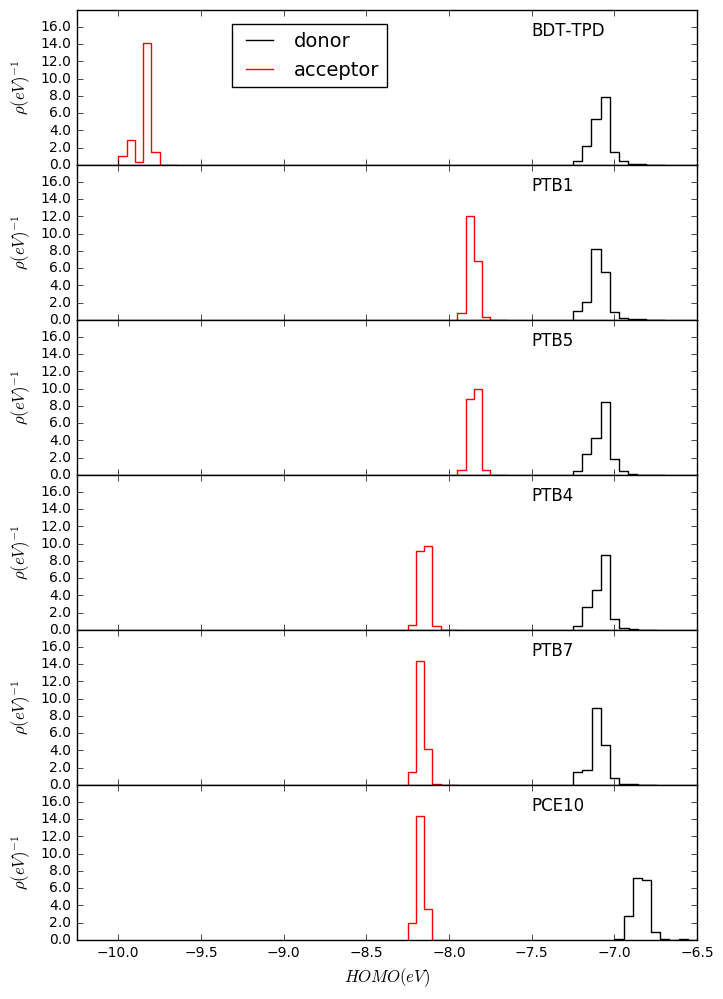

In [19]:

fig, ax = plt.subplots(6,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o



    print calc_i.properties['name']
    val_i = calc_i.HOMO_D
    #fig, ax = plt.subplots(1)
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps",label='donor')
    val_j = calc_i.HOMO_A
    ax[i].plot(val_j.bins_steps,val_j.hist_steps,'r-.',ls = "steps",label='acceptor')

    #ax[i].set_xlabel(r'$R^2$ ($\AA^2$)',fontsize=12)
    #ax[i].set_xlabel(r'$l^2$ ($\AA^2$)',fontsize=12)
    ax[i].set_xlabel(r'$HOMO(eV) $',fontsize=12)
    ax[i].set_ylabel(r'$\rho(eV)^{-1}$',fontsize=12)
    ax[i].set_xlim(-10.25,-6.5)
    ax[i].set_ylim(0.0,18.0)
    #ax[i].text(55,0.015,name_i)
    #ax[i].set_xlim(0,1.0)
    #ax[i].set_ylim(0.0,10.0)
    ax[i].text(-7.5,15.0,name_i,fontsize=12)

    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)    

    i+=1


ax[0].legend(loc=(0.25,0.50),prop={'size':14})
fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

    
#i += -1

In [ ]:
fig_name = "unit_%s_DA_hist.pdf"%(key_i)
print fig_name
fig.savefig(fig_name,format='pdf')

In [20]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables')

In [21]:
table_lines = ' Polymer & $<HOMO_{D}>$ & $\sigma(HOMO_{D})$  & $<HOMO_{A}>$ & $\sigma(HOMO_{A})$ \n'
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print  calc_i.tag  ,name_i
    table_lines += '%s '%(name_i) #calc_i.tag)
    table_lines += '& %8.2f & %8.2e '%(calc_i.HOMO_D.mean,calc_i.HOMO_D.std)
    table_lines += '& %8.2f & %8.2e '%(calc_i.HOMO_A.mean,calc_i.HOMO_A.std)
    table_lines += '\\\\ \n'

print table_lines    
f = open('unitHOMO.tex','w')
f.write(table_lines)
f.close()    
    

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1 BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1 PCE10
 Polymer & $<HOMO_{D}>$ & $\sigma(HOMO_{D})$  & $<HOMO_{A}>$ & $\sigma(HOMO_{A})$ 
BDT-TPD &    -7.08 & 5.57e-02 &    -9.85 & 5.09e-02 \\ 
PTB1 &    -7.10 & 5.44e-02 &    -7.86 & 2.40e-02 \\ 
PTB5 &    -7.08 & 5.49e-02 &    -7.85 & 2.63e-02 \\ 
PTB4 &    -7.08 & 5.19e-02 &    -8.15 & 2.52e-02 \\ 
PTB7 &    -7.10 & 5.24e-02 &    -8.17 & 2.16e-02 \\ 
PCE10 &    -6.84 & 4.45e-02 &    -8.17 & 2.26e-02 \\ 



In [57]:
homo_d = dict()
homo_d['name'] = []
homo_d['tag'] = []
homo_d['Den'] = []
homo_d['Dstd'] = []
homo_d['Aen'] = []
homo_d['Astd'] = []

for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print  calc_i.tag  ,name_i
    val_i = calc_i.HOMO_D
    val_j = calc_i.HOMO_A
    print name_i,val_i.mean,val_i.std,val_j.mean,val_j.std
    homo_d['name'].append(calc_i.properties['name'])
    homo_d['tag'].append(tag_i)
    homo_d['Den'].append(val_i.mean)
    homo_d['Dstd'].append(val_i.std)
    homo_d['Aen'].append(val_j.mean)
    homo_d['Astd'].append(val_j.std)

    

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1 BDT-TPD
BDT-TPD -7.08044083902 0.0557025312668 -9.8450859384 0.0509473821085
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB1
PTB1 -7.09661978271 0.0543882413874 -7.85867349453 0.0240190055343
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB5
PTB5 -7.07875590116 0.0548776614736 -7.84948108356 0.0262553997839
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB4
PTB4 -7.08271790286 0.0518639289772 -8.15005257798 0.0251655912058
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB7
PTB7 -7.10136623298 0.0524386356368 -8.16771342489 0.0216326193937
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1 PCE10
PCE10 -6.83934173131 0.0444615372491 -8.17085087562 0.0225833438297


In [58]:
print homo_d

{'name': [u'BDT-TPD', u'PTB1', u'PTB5', u'PTB4', u'PTB7', u'PCE10'], 'Astd': [0.05094738210851582, 0.02401900553426427, 0.026255399783888134, 0.02516559120583872, 0.02163261939368485, 0.022583343829697452], 'tag': ['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1', 'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1', 'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1', 'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1', 'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1', 'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'], 'Den': [-7.080440839023892, -7.096619782706694, -7.078755901155877, -7.082717902864629, -7.101366232976111, -6.839341731307848], 'Dstd': [0.055702531266849015, 0.054388241387350905, 0.05487766147362944, 0.05186392897715882, 0.052438635636789195, 0.04446153724911

In [59]:
pd_df = pd.DataFrame(homo_d)

In [60]:
print pd_df

        Aen      Astd       Den      Dstd     name  \
0 -9.845086  0.050947 -7.080441  0.055703  BDT-TPD   
1 -7.858673  0.024019 -7.096620  0.054388     PTB1   
2 -7.849481  0.026255 -7.078756  0.054878     PTB5   
3 -8.150053  0.025166 -7.082718  0.051864     PTB4   
4 -8.167713  0.021633 -7.101366  0.052439     PTB7   
5 -8.170851  0.022583 -6.839342  0.044462    PCE10   

                                                 tag  
0  D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_p...  
1  D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_p...  
2  D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_p...  
3  D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_p...  
4  D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_p...  
5  D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_p...  


In [61]:
os.chdir('/Users/tkemper/Projects/DApolymers/materials')

In [62]:
f=open('unit_HOMO.csv','w')
f.write(pd_df.to_csv())
f.close()

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['notebook'])
    calc_i.dump_json()
os.chdir(proj_i.dir['notebook'])
proj_i.dump_json()

In [35]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    calc_i.meta['use'] = False 

In [36]:

proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
# With F and thiophenes 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1'].meta['use'] = True 



In [53]:
for tag_i,calc_o in proj_i.calculations.iteritems():
    print tag_i
    print calc_o.properties['name'],calc_o.meta['use']


D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1
BDT-TPD False
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
PCE10 True
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1
PCE10 False
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB4 True
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
PTB7 False
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB1 False
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB5 False
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
PCE10 True
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
PTB4 False
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
PTB7 T

In [54]:
table_lines = ' Polymer & $<HOMO_{D}>$ & $\sigma(HOMO_{D})$  & $<HOMO_{A}>$ & $\sigma(HOMO_{A})$ \n'
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o

            print  calc_i.tag  ,name_i
            table_lines += '%s '%(name_i) #calc_i.tag)
            table_lines += '& %8.2f & %8.2e '%(calc_i.HOMO_D.mean,calc_i.HOMO_D.std)
            table_lines += '& %8.2f & %8.2e '%(calc_i.HOMO_A.mean,calc_i.HOMO_A.std)
            table_lines += '\\\\ \n'

print table_lines    
#f = open('unitHOMOv2.tex','w')
#f.write(table_lines)
#f.close()    
    

D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1 PCE10
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PCE10
 Polymer & $<HOMO_{D}>$ & $\sigma(HOMO_{D})$  & $<HOMO_{A}>$ & $\sigma(HOMO_{A})$ 
PTB4 &    -7.08 & 5.14e-02 &    -8.15 & 2.52e-02 \\ 
PTB7 &    -7.10 & 5.24e-02 &    -8.17 & 2.16e-02 \\ 
PCE10 &    -6.85 & 1.27e-01 &    -8.17 & 2.26e-02 \\ 
PCE10 &    -6.85 & 1.27e-01 &    -8.17 & 2.26e-02 \\ 



In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print 'proj_ref.calculations[\''+tag_i+'\'].meta[\'use\'] = True '
    calc_i.meta['use'] = False 
    #print calc_i.properties['update']

In [ ]:
fig, ax = plt.subplots(3,sharex=True)

i = 0
xmin = -8.5

calc_i = proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1']
print calc_i.properties['name']
val_i = calc_i.HOMO_D
ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps",label='donor')
val_j = calc_i.HOMO_A
ax[i].plot(val_j.bins_steps,val_j.hist_steps,'b-.',ls = "steps",label='acceptor(H)')
 
calc_i = proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1']
print calc_i.properties['name']
val_j = calc_i.HOMO_A
ax[i].plot(val_j.bins_steps,val_j.hist_steps,'r-.',ls = "steps",label='acceptor(F)')
ax[i].set_xlabel(r'$HOMO(eV) $',fontsize=12)
ax[i].set_ylabel(r'$\rho(eV)^{-1}$',fontsize=12)
ax[i].set_xlim(xmin,-6.5)
ax[i].set_ylim(0.0,18.0)
ax[i].text(-7.5,15.0,calc_i.properties['name'],fontsize=12)
labels=ax[i].get_yticks().tolist()
labels[-1]=''
ax[i].set_yticklabels(labels)    
ax[i].legend(loc=(0.25,0.250),prop={'size':12})
i+=1



calc_i = proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1']
print calc_i.properties['name']
val_i = calc_i.HOMO_D
ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps",label='donor')
val_j = calc_i.HOMO_A
ax[i].plot(val_j.bins_steps,val_j.hist_steps,'b-.',ls = "steps",label='acceptor(H)')
 
calc_i = proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1']
print calc_i.properties['name']
val_j = calc_i.HOMO_A
ax[i].plot(val_j.bins_steps,val_j.hist_steps,'r-.',ls = "steps",label='acceptor(F)')
ax[i].set_xlabel(r'$HOMO(eV) $',fontsize=12)
ax[i].set_ylabel(r'$\rho(eV)^{-1}$',fontsize=12)
ax[i].set_xlim(xmin,-6.5)
ax[i].set_ylim(0.0,18.0)
ax[i].text(-7.5,15.0,calc_i.properties['name'],fontsize=12)
labels=ax[i].get_yticks().tolist()
labels[-1]=''
ax[i].set_yticklabels(labels)    
ax[i].legend(loc=(0.25,0.250),prop={'size':12})
i+=1

calc_i = proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1']
print calc_i.properties['name']
val_i = calc_i.HOMO_D
ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps",label='donor')
val_j = calc_i.HOMO_A
ax[i].plot(val_j.bins_steps,val_j.hist_steps,'b-.',ls = "steps",label='acceptor(H)')
 
calc_i = proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1']
print calc_i.properties['name']
val_j = calc_i.HOMO_A
ax[i].plot(val_j.bins_steps,val_j.hist_steps,'r-.',ls = "steps",label='acceptor(F)')

calc_i = proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1']
print calc_i.properties['name']
val_i = calc_i.HOMO_D
ax[i].plot(val_i.bins_steps,val_i.hist_steps,'g:',ls = "steps",label='donor (no Th)')

ax[i].set_xlabel(r'$HOMO(eV) $',fontsize=12)
ax[i].set_ylabel(r'$\rho(eV)^{-1}$',fontsize=12)
ax[i].set_xlim(xmin,-6.5)
ax[i].set_ylim(0.0,18.0)
ax[i].text(-7.5,15.0,calc_i.properties['name'],fontsize=12)
labels=ax[i].get_yticks().tolist()
labels[-1]=''
ax[i].set_yticklabels(labels)    
ax[i].legend(loc=(0.25,0.250),prop={'size':12})
i+=1





fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

    
#i += -1

In [ ]:
fig_name = "unit_%s_DA_hist2.pdf"%(key_i)
print fig_name
fig.savefig(fig_name,format='pdf')